# Titanic Using SVM - Kaggle Competition

Author: Szymon Pawłowski\
Date: 29.04.2021r.

# Biblioteki

In [1]:
#Biblioteki do obróbki danych
import pandas as pd
import numpy as np
import random

#Biblioteki do wizualizacji
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Biblioteki do nauczania maszynowego
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Wczytanie danych i pierwsze spojrzenie

In [2]:
#Załadowanie danych z url
test_csv = (r'https://raw.githubusercontent.com/szpwski/titanic_kaggle_competition/main/Python/test.csv')
train_csv = (r'https://raw.githubusercontent.com/szpwski/titanic_kaggle_competition/main/Python/train.csv')

test_df = pd.read_csv(test_csv)
train_df = pd.read_csv(train_csv)

In [2]:
#Mozna takze pobrac surowe dane z adresu: https://www.kaggle.com/c/titanic/data
#Wypakowac pliki test.csv i train.csv do folderu roboczego, a nastepnie je wczytac
#test_df = pd.read_csv("test.csv")
#train_df = pd.read_csv("train.csv")

In [3]:
#Złączenie danych do wstępnego ich przetworzenia
df = pd.concat([train_df,test_df])

In [4]:
#Obraz piewrszych 5 obserwacji
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Obraz ostatnich 5 obserwacji
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
#Podstawowe informacje o obiekcie
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
#Odrzucenie kolumn PassengerId, Cabin, Ticket
df = df.drop(["PassengerId","Cabin","Ticket"],axis=1)

In [8]:
#Wyselekcjonowanie listy kolumn kategorycznych
obj_cols = list(df.select_dtypes("object").columns)
obj_cols

['Name', 'Sex', 'Embarked']

In [9]:
#Wyselekcjonowanie listy kolumn numerycznych
cont_cols = list(df.select_dtypes(["float64","int64"]).columns)
cont_cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Exploratory Data Analysis (EDA)

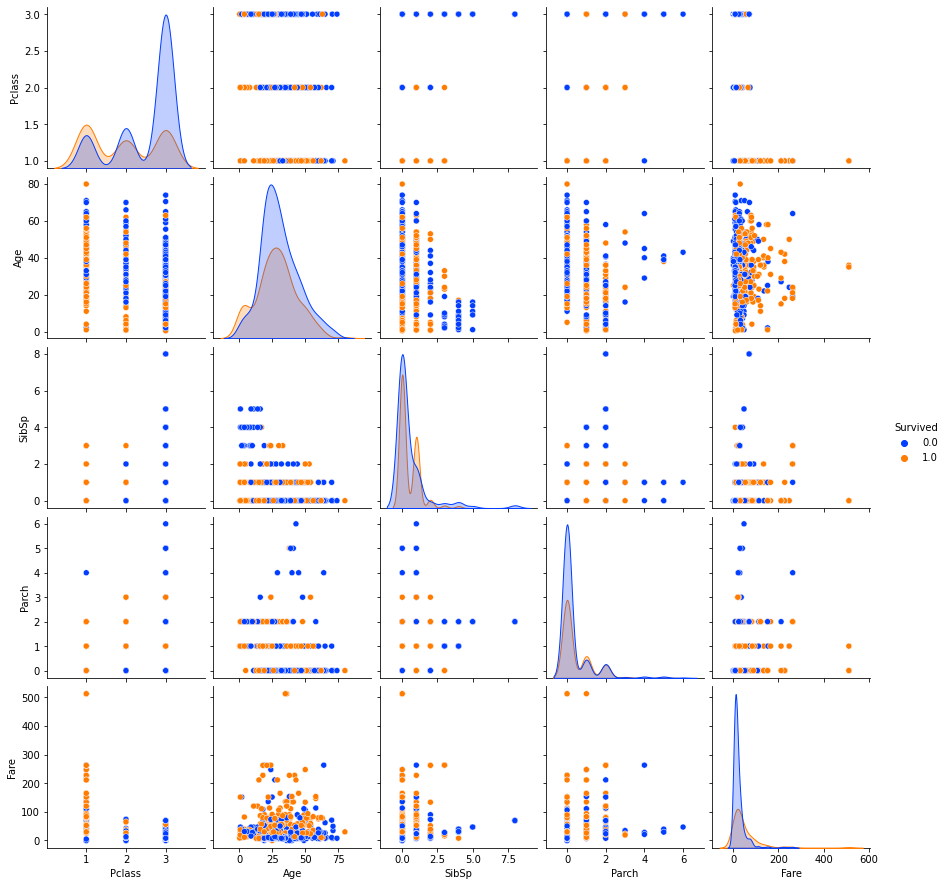

In [10]:
#Wykres pairplot
sns.pairplot(df[cont_cols], hue="Survived", dropna=True,palette="bright")
plt.show()

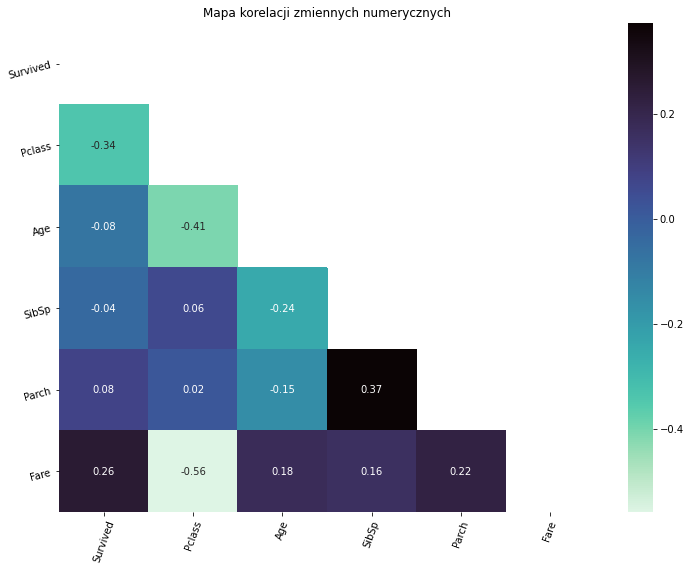

In [11]:
#Mapa korelacji zmiennych numerycznych
cm = df[cont_cols].corr()
mask = np.triu(np.ones_like(cm, dtype=np.bool))

f, ax = plt.subplots(figsize=(12, 9))
g1 = sns.heatmap(cm,cmap='mako_r',fmt='.2f', annot=True, mask=mask)
g1.set_xticklabels(g1.get_xticklabels(),rotation=70,fontsize=10)
g1.set_yticklabels(g1.get_yticklabels(),rotation=15,fontsize=10)
plt.title("Mapa korelacji zmiennych numerycznych")
plt.show()

**Pclass**

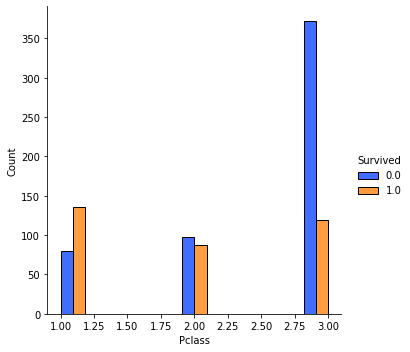

In [12]:
#Histogram zmiennej Pclass
sns.displot(df, x="Pclass", hue="Survived", multiple="dodge",palette="bright")
plt.show()

**Sex**

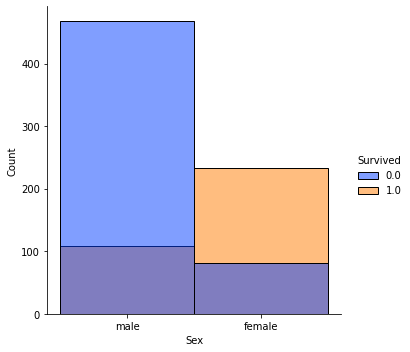

In [13]:
#Histogram zmiennej Sex
sns.displot(df, x="Sex", hue="Survived", palette="bright")
plt.show()

#### Parch

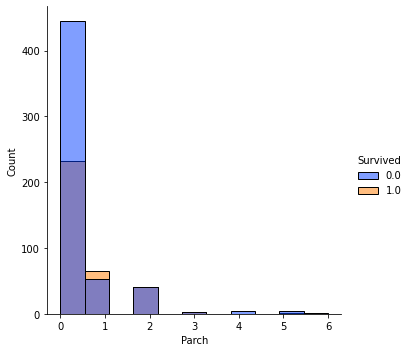

In [14]:
#Histogram zmiennej Parch
sns.displot(df, x="Parch", hue="Survived", palette="bright")
plt.show()

#### SibSp

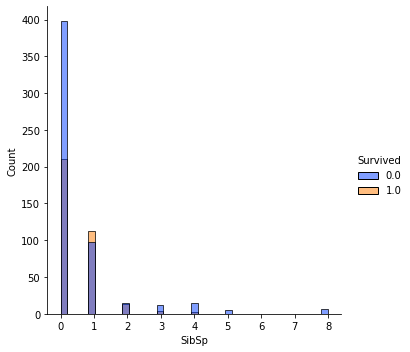

In [15]:
#Histogram zmiennej SibSp
sns.displot(df, x="SibSp", hue="Survived", palette="bright")
plt.show()

**Age**

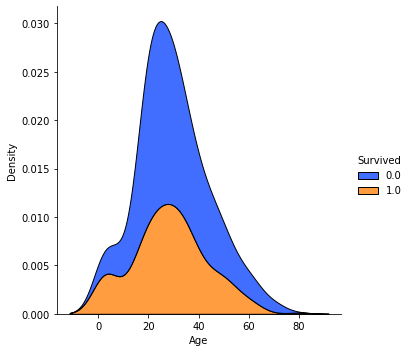

In [16]:
#Histogram zmiennej Age
sns.displot(df, x="Age", hue="Survived",kind="kde", palette="bright",multiple="stack")
plt.show()

**Fare**

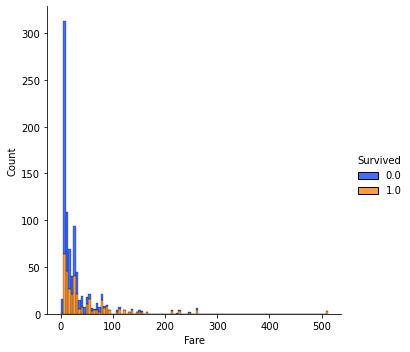

In [17]:
#Histogram zmiennej Fare
sns.displot(df, x="Fare", hue="Survived",palette="bright",multiple="stack")
plt.show()

**Embarked**

In [18]:
#Pozbycie się braków danych poprzez losowy wybór wartości
df.Embarked[df.Embarked.isna()==True]=random.choice(["C","Q","S"])

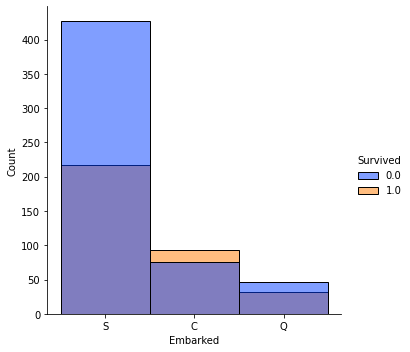

In [19]:
#Histogram zmiennej Embarked
sns.displot(df, x="Embarked", hue="Survived", palette="bright")
plt.show()

### Label encoding for object variables to insight the data

In [20]:
#Funkcja etykietowania danych
labelencoder = preprocessing.LabelEncoder()

In [21]:
#Etykietowanie danych kategorycznych (dzielenie w celu zapobiegnięcie przecieku danych)
df_obj = df[obj_cols].astype('str').apply(labelencoder.fit_transform)

df_obj["Survived"] = df.Survived

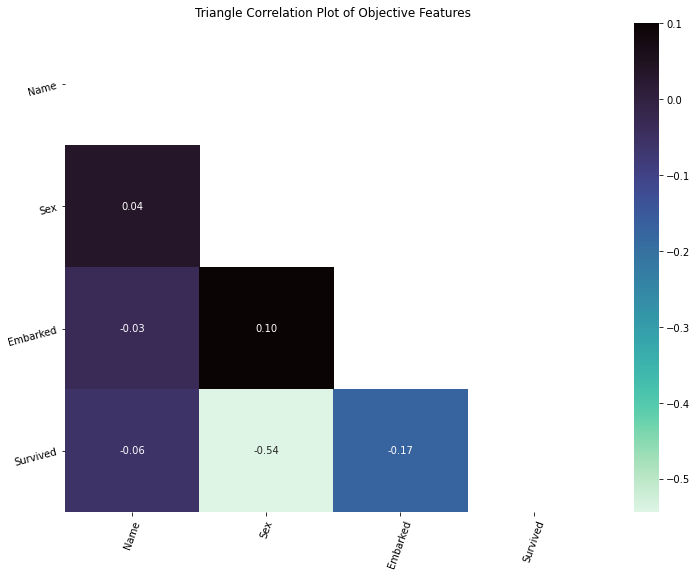

In [22]:
#Mapa korelacji dla zmiennych kategorycznych
cm_obj = df_obj.corr()
mask_obj = np.triu(np.ones_like(cm_obj, dtype=np.bool))

f, ax = plt.subplots(figsize=(12, 9))
g2 = sns.heatmap(cm_obj,cmap='mako_r',fmt='.2f', annot=True, mask=mask_obj)
g2.set_xticklabels(g2.get_xticklabels(),rotation=70,fontsize=10)
g2.set_yticklabels(g2.get_yticklabels(),rotation=15,fontsize=10)
plt.title("Triangle Correlation Plot of Objective Features")
plt.show()

# Feature Engineering

**Sex**

In [23]:
#Zmiana w zmienną binarną
df.Sex[df.Sex=="male"] = 0
df.Sex[df.Sex=="female"] = 1

df.Sex = df.Sex.astype(int)

**Embarked**

In [24]:
#Zmiana w zmienną numeryczną
df.Embarked[df.Embarked=="C"] = 0
df.Embarked[df.Embarked=="Q"] = 1
df.Embarked[df.Embarked=="S"] = 2

df.Embarked = df.Embarked.astype(int)

**Family Size**

In [25]:
#Stworzenie zmiennej FamilySize
df["FS"] = df.Parch + df.SibSp + 1

#Skategoryzowanie zmiennej Family size
df.FS[df.FS==1] = 0 #samotny pasażer
df.FS[(1<df.FS) & (df.FS<5)] = 1 #pasażer z rodziną
df.FS[df.FS>=5] = 2 #pasażer z wieloosobową rodziną

df.FS = df.FS.astype(int)
df.Parch = df.Parch.astype(int)
df.SibSp = df.SibSp.astype(int)

**Titles**

In [26]:
#Stworzenie zmiennej Titles na podstawie tytułów w zmiennej Name
df["Titles"]=df.Name.str.extract('([A-Za-z]+)\.',expand=False) #extracting titles

In [27]:
#Wyświetlenie unikatowych tytułów
df.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [28]:
#Stworzenie skategoryzowanej zmiennej TitlesBi
df["TitlesBi"] = df.Titles
df.TitlesBi[df.Titles.isin(["Capt","Col","Major","Dr","Rev"])] = 0 #tytuły szlacheckie
df.TitlesBi[df.Titles.isin(["Jonkheer","Don","Sir","Countess","Dona","Lady"])] = 1 #tytuły oficerskie
df.TitlesBi[df.Titles.isin(["Mme","Ms","Mrs",'Mr'])] = 2 #Pan/Pani
df.TitlesBi[df.Titles.isin(["Mlle","Miss", "Master"])] = 3 #Panna, chłopiec
df.TitlesBi = df.TitlesBi.astype(int)

In [29]:
#Opuszczenie zmiennej Name, Titles, Parch, SibSp
df = df.drop(["Name","Titles"],axis=1)

**Fare**

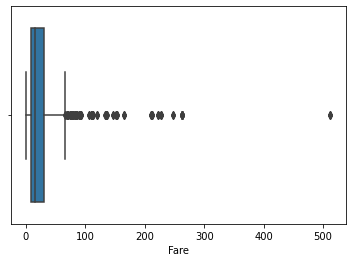

In [30]:
#Wykres pudełkowy zmiennej Age
sns.boxplot(df.Fare)
plt.show()

In [31]:
#Wypełnienie braków danych zmiennej Fare medianą
df.Fare[df.Fare.isnull()==True] = df.Fare.median()

**Age**

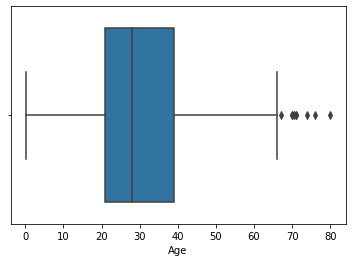

In [32]:
#Wykres pudełkowy zmiennej Age
sns.boxplot(df.Age)
plt.show()

In [33]:
#Wypełnienie wartości zmiennej Age medianą
df.Age[df.Age.isnull()==True] = df.Age.median()

In [34]:
#Sprawdzenie głównych informacji po przetworzeniu danych
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int32  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int32  
 5   Parch     1309 non-null   int32  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   int32  
 8   FS        1309 non-null   int32  
 9   TitlesBi  1309 non-null   int32  
dtypes: float64(3), int32(6), int64(1)
memory usage: 81.8 KB


# Walidacja modelu SVM

In [37]:
#Wyciągnięcie kolumn ze zmiennymi całkowitymi
int_cols = list(df.select_dtypes(["int64","int32"]).columns)
int_cols

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'FS', 'TitlesBi']

In [38]:
#Ostateczny podział na zbiór testowy i treningowy
train= df[df.Survived.isnull()==False]
test= df[df.Survived.isnull()==True]

X = train.drop(["Survived"],axis=1)
Y = train.Survived

X_test = test.drop(["Survived"],axis=1)

In [39]:
#Kodowanie One-Hot Encoding
OHE = preprocessing.OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_train = pd.DataFrame(OHE.fit_transform(X))
OH_test = pd.DataFrame(OHE.transform(X_test))

#OHE usuwa index, więc wstawiany jest z powrotem
OH_train.index = X.index
OH_test.index = X_test.index

#Usunięcie kolumn ze zmiennymi całkowitymi, które zostaną zastąpione przez OHE
num_X_train = X.drop(int_cols, axis=1)
num_X_test = X_test.drop(int_cols, axis=1)

#Dodanie kolumn OHE do pozostałych
x_train = pd.concat([num_X_train, OH_train], axis=1)
x_test = pd.concat([num_X_test, OH_test], axis=1)

#Kodowanie zmiennej celu
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)

In [40]:
#Stworzenie zbioru walidacyjnego
xtr, xt, ytr, yt = train_test_split(x_train, Y, test_size=0.33)

In [41]:
#KERNEL = RBF ##

#Stworzenie potoku ze standaryzowaniem i dopasowywaniem modelu
pipe_steps_rbf = [('scaler_rbf', StandardScaler()), ('SVM_rbf', svm.SVC())]

#Parametry do tuningowania przez walidacje krzyżową
check_params_rbf= {
    'SVM_rbf__C': [0.1, 1, 10, 100, 1000],  
    'SVM_rbf__gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

pipeline_rbf = Pipeline(pipe_steps_rbf)

#Tuningowanie parametrów poprzez walidację krzyżową
grid_rbf = GridSearchCV(pipeline_rbf, check_params_rbf, cv=3, n_jobs=-1, scoring='accuracy')

#Dopasowanie modelu
grid_rbf.fit(xtr,ytr)

#Najlepsze parametry
print("Grid search best params: ", grid_rbf.best_params_)

Grid search best params:  {'SVM_rbf__C': 10, 'SVM_rbf__gamma': 0.0001}


In [42]:
##KERNEL = POLYNOMIAL ##

#Stworzenie potoku ze standaryzowaniem i dopasowywaniem modelu
pipe_steps_poly = [('scaler_poly', StandardScaler()), ('SVM_poly', svm.SVC(kernel='poly'))]

#Parametry do tuningowania przez walidacje krzyżową
check_params_poly= {
    'SVM_poly__C': [0.1, 1, 10, 100, 1000],  
    'SVM_poly__degree': [2, 3, 4]
}

pipeline_poly = Pipeline(pipe_steps_poly)

#Tuningowanie parametrów poprzez walidację krzyżową
grid_poly = GridSearchCV(pipeline_poly, check_params_poly, cv=3, n_jobs=-1, scoring='accuracy')

#Dopasowanie modelu
grid_poly.fit(xtr,ytr)

#Najlepsze parametry
print("Grid search best params: ", grid_poly.best_params_)

Grid search best params:  {'SVM_poly__C': 1, 'SVM_poly__degree': 2}


In [43]:
##KERNEL = LINEAR ##

#Stworzenie potoku ze standaryzowaniem i dopasowywaniem modelu
pipe_steps_lin = [('scaler_lin', StandardScaler()), ('SVM_lin', svm.SVC(kernel='linear'))]

#Parametry do tuningowania przez walidacje krzyżową
check_params_lin= {
    'SVM_lin__C': [0.1, 1, 10, 100, 1000]  
}

pipeline_lin = Pipeline(pipe_steps_lin)

#Tuningowanie parametrów poprzez walidację krzyżową
grid_lin = GridSearchCV(pipeline_lin, check_params_lin, cv=3, n_jobs=-1, scoring='accuracy')

#Dopasowanie modelu
grid_lin.fit(xtr,ytr)

#Najlepsze parametry
print("Grid search best params: ", grid_lin.best_params_)

Grid search best params:  {'SVM_lin__C': 0.1}


In [44]:
#Predykcje klasyfikatorów
rbf_pre = grid_rbf.predict(xt)

lin_pre = grid_lin.predict(xt)

poly_pre = grid_poly.predict(xt)

In [45]:
#Raport klasyfikacji modelu opartego na zbiorze z ciągłymi zmiennymi Age, Fare
cm_lin = confusion_matrix(yt, lin_pre)
cm_poly = confusion_matrix(yt,poly_pre)
cm_rbf = confusion_matrix(yt,rbf_pre)

print(classification_report(yt,lin_pre))
print(classification_report(yt,poly_pre))
print(classification_report(yt,rbf_pre))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       186
           1       0.67      0.73      0.70       109

    accuracy                           0.77       295
   macro avg       0.75      0.76      0.75       295
weighted avg       0.77      0.77      0.77       295

              precision    recall  f1-score   support

           0       0.66      0.91      0.77       186
           1       0.58      0.20      0.30       109

    accuracy                           0.65       295
   macro avg       0.62      0.56      0.53       295
weighted avg       0.63      0.65      0.59       295

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       186
           1       0.74      0.67      0.70       109

    accuracy                           0.79       295
   macro avg       0.78      0.76      0.77       295
weighted avg       0.79      0.79      0.79       295



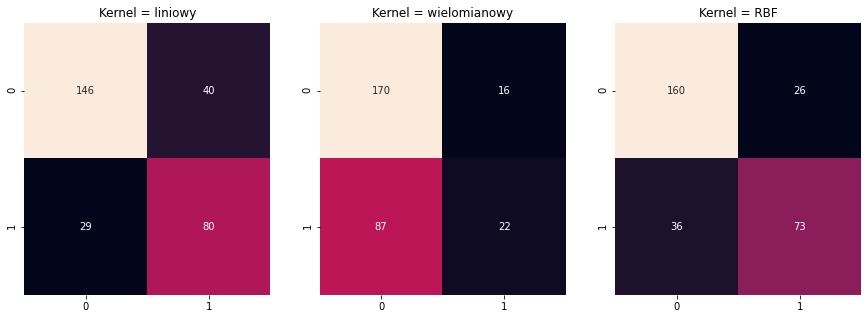

In [62]:
#Macierz pomyłek dla SVM różnych kerneli
dflin = pd.DataFrame(cm_lin, range(2), range(2))
dfpoly = pd.DataFrame(cm_poly, range(2), range(2))
dfrbf = pd.DataFrame(cm_rbf, range(2), range(2))

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.heatmap(dflin,annot=True,cbar=False,fmt='g', ax=ax[0])
ax[0].set_title("Kernel = liniowy")
sns.heatmap(dfpoly,annot=True,cbar=False,fmt='g', ax=ax[1])
ax[1].set_title("Kernel = wielomianowy")
sns.heatmap(dfrbf,annot=True,cbar=False,fmt='g', ax=ax[2])
ax[2].set_title("Kernel = RBF")

plt.show()

# Wybór cech

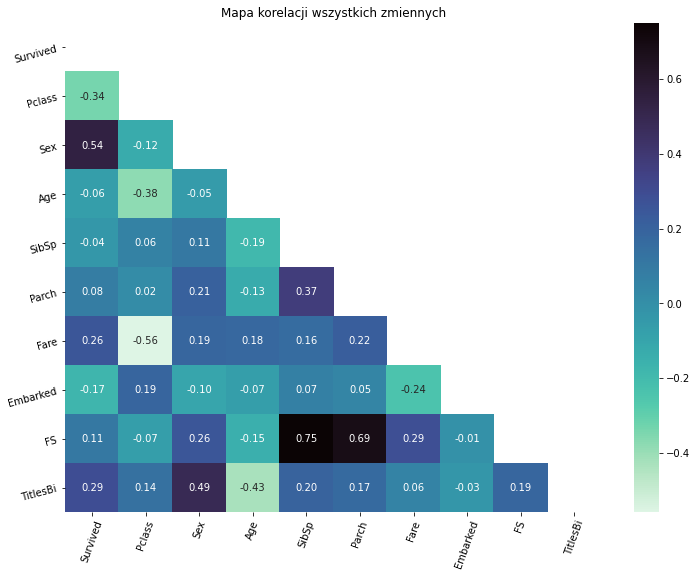

In [64]:
#Mapa korelacji zmiennych numerycznych
cm = df.corr()
mask = np.triu(np.ones_like(cm, dtype=np.bool))

f, ax = plt.subplots(figsize=(12, 9))
g1 = sns.heatmap(cm,cmap='mako_r',fmt='.2f', annot=True, mask=mask)
g1.set_xticklabels(g1.get_xticklabels(),rotation=70,fontsize=10)
g1.set_yticklabels(g1.get_yticklabels(),rotation=15,fontsize=10)
plt.title("Mapa korelacji wszystkich zmiennych")
plt.show()

In [48]:
#Zbiór danych po selekcji zmiennych metodą współczynnika korelacji
df2 = df.drop(['Age','SibSp','Parch','Embarked','FS'], axis=1)

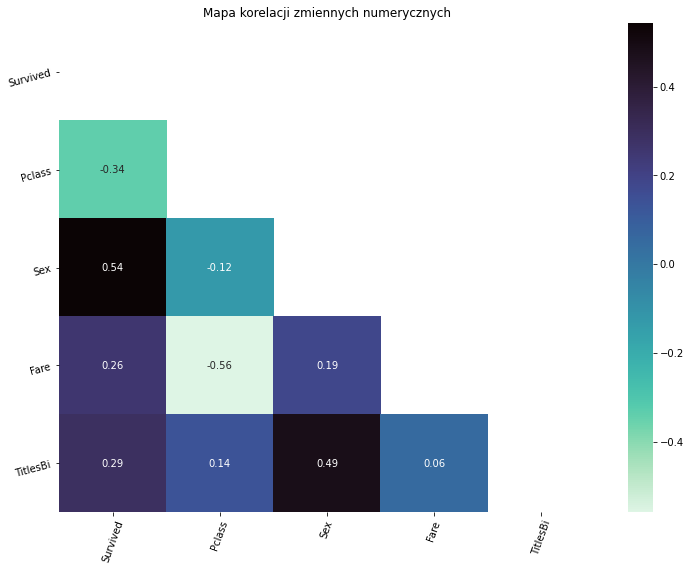

In [63]:
#Mapa korelacji zmiennych numerycznych
cm2 = df2.corr()
mask2 = np.triu(np.ones_like(cm2, dtype=np.bool))

f, ax = plt.subplots(figsize=(12, 9))
g1 = sns.heatmap(cm2,cmap='mako_r',fmt='.2f', annot=True, mask=mask2)
g1.set_xticklabels(g1.get_xticklabels(),rotation=70,fontsize=10)
g1.set_yticklabels(g1.get_yticklabels(),rotation=15,fontsize=10)
plt.title("Mapa korelacji zmiennych numerycznych")
plt.show()

In [49]:
#Wyciągnięcie kolumn ze zmiennymi całkowitymi
int_cols2 = list(df2.select_dtypes(["int64","int32"]).columns)
int_cols2

['Pclass', 'Sex', 'TitlesBi']

In [50]:
#Ostateczny podział na zbiór testowy i treningowy
train2= df2[df2.Survived.isnull()==False]
test2= df2[df2.Survived.isnull()==True]

X2 = train2.drop(["Survived"],axis=1)
Y2 = train2.Survived

X_test2 = test2.drop(["Survived"],axis=1)

In [51]:
#Kodowanie One-Hot Encoding
OHE2 = preprocessing.OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_train2 = pd.DataFrame(OHE.fit_transform(X2))
OH_test2 = pd.DataFrame(OHE.transform(X_test2))

#OHE usuwa index, więc wstawiany jest z powrotem
OH_train2.index = X2.index
OH_test2.index = X_test2.index

#Usunięcie kolumn ze zmiennymi całkowitymi, które zostaną zastąpione przez OHE
num_X_train2 = X2.drop(int_cols2, axis=1)
num_X_test2 = X_test2.drop(int_cols2, axis=1)

#Dodanie kolumn OHE do pozostałych
x_train2 = pd.concat([num_X_train2, OH_train2], axis=1)
x_test2 = pd.concat([num_X_test2, OH_test2], axis=1)

#Kodowanie zmiennej celu
le2 = preprocessing.LabelEncoder()
Y2 = le.fit_transform(Y)

In [52]:
#Stworzenie zbioru walidacyjnego
xtr2, xt2, ytr2, yt2 = train_test_split(x_train2, Y2, test_size=0.33)

In [53]:
#KERNEL = RBF ##

#Stworzenie potoku ze standaryzowaniem i dopasowywaniem modelu
pipe_steps_rbf2 = [('scaler_rbf2', StandardScaler()), ('SVM_rbf2', svm.SVC())]

#Parametry do tuningowania przez walidacje krzyżową
check_params_rbf2= {
    'SVM_rbf2__C': [0.1, 1, 10, 100, 1000],  
    'SVM_rbf2__gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

pipeline_rbf2 = Pipeline(pipe_steps_rbf2)

#Tuningowanie parametrów poprzez walidację krzyżową
grid_rbf2 = GridSearchCV(pipeline_rbf2, check_params_rbf2, cv=3, n_jobs=-1, scoring='accuracy')

#Dopasowanie modelu
grid_rbf2.fit(xtr2,ytr2)

#Najlepsze parametry
print("Grid search best params: ", grid_rbf2.best_params_)

Grid search best params:  {'SVM_rbf2__C': 1000, 'SVM_rbf2__gamma': 0.001}


In [55]:
#Predykcja dla zbioru z selekcją cech
rbf_pre2 = grid_rbf2.predict(xt2)

In [56]:
#Porównanie wyników modeli bez i z selekcją cech
print(classification_report(yt,rbf_pre))
print(classification_report(yt2,rbf_pre2))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       186
           1       0.74      0.67      0.70       109

    accuracy                           0.79       295
   macro avg       0.78      0.76      0.77       295
weighted avg       0.79      0.79      0.79       295

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       184
           1       0.81      0.75      0.78       111

    accuracy                           0.84       295
   macro avg       0.83      0.82      0.83       295
weighted avg       0.84      0.84      0.84       295



In [57]:
#Tworzenie modelu z najlepszymi parametrami
svm_final = svm.SVC(kernel='rbf', C=1000, gamma=0.001)

In [58]:
#Dopasowanie danych
svm_final.fit(x_train2, Y2)

SVC(C=1000, gamma=0.001)

In [59]:
#Dokonanie predykcji
predicted = svm_final.predict(x_test2)

In [60]:
#Zapisanie wyników do pliku CSV, aby móc zatwierdzić je do Kaggle'a
submission = pd.DataFrame({ 'PassengerId': test_df.PassengerId,
                            'Survived': predicted })
submission.to_csv("submission.csv", index=False)